# Churn prediction via logistic regression
Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. For example, if Netflix knew a segment of customers who were at risk of churning they could proactively engage them with special offers instead of simply losing them.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

## Importing

In [1]:
# Importing the library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('churn.csv')
df = df.apply(LabelEncoder().fit_transform) # label encoding for non-numeric data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


## Variable splitting

In [3]:
# Splitting the dataset in independent and dependent variables
X = df.iloc[:,:20].values # first 20 columns are the features that contribute to the churn
y = df['Churn'].values # last column is the label

## Principal component analysis

In [4]:
pca = PCA(n_components=5)
pca.fit_transform(X)

array([[ 1.83835959e+03, -8.30193120e+02, -4.78422675e+02,
        -2.39694458e+01,  1.06579498e+00],
       [ 4.04396127e+02, -1.80937702e+03, -4.48713735e+01,
         5.91769313e+00,  1.24174226e-01],
       [-1.02000566e+03, -3.09062048e+03, -7.80959511e+00,
        -2.36445207e+01,  1.44564323e-01],
       ...,
       [-1.59245868e+02, -3.02337915e+02, -5.24862562e+02,
        -1.42486244e+01,  1.19680954e+00],
       [ 2.40027904e+03, -6.36290180e+02,  1.61531992e+02,
        -2.94064453e+01,  1.21890487e+00],
       [-1.25102372e+03,  2.22339911e+03,  5.33345366e+02,
         2.25599868e+01, -1.06326767e+00]])

## Train-test split and feature scaling

In [5]:
# Splitting the dataset into the training set and test set
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [6]:
# Feature scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Model selection and fitting

In [7]:
# Fitting Naive Bayes Classification to the training set with linear kernel
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Predicting the test set results
y_pred = lr.predict(X_test)
print(y_pred)

[0 1 1 ... 0 0 0]


## Area under the ROC curve of the test set

In [9]:
print("Accuracy:", "{0:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.75


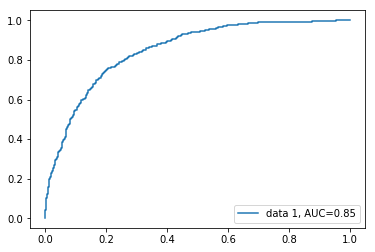

In [10]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+"{0:.2f}".format(auc))
plt.legend(loc=4)
plt.show()

In [11]:
print("AUC:", "{0:.2f}".format(auc))

AUC: 0.85
